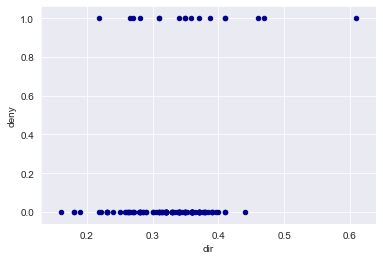

In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

sns.set_style("darkgrid")

import pandas as pd
import numpy as np
import ast
import random
import math 
import time
import sys 

np.random.seed(12)

data = pd.read_csv("Hdma.csv")

#string_data = data.astype('category')
#data = string_data.cat.codes

data = data.replace({'no': 0, 'yes': 1})

#print(data.head)

dataSmall = data[:127]

ax1 = dataSmall.plot.scatter(x='dir', y='deny', c='DarkBlue')

In [2]:
data['const'] = 1


reg1 = sm.OLS(endog=data['deny'], exog=data[['const','dir']], missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   deny   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     98.41
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.37e-23
Time:                        09:55:32   Log-Likelihood:                -651.42
No. Observations:                2380   AIC:                             1307.
Df Residuals:                    2378   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0799      0.021     -3.777      0.0

In [3]:
reg1 = sm.OLS(endog=data['deny'], exog=data[['const','dir','black']], missing='drop')
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   deny   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     97.76
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.58e-41
Time:                        09:55:41   Log-Likelihood:                -605.61
No. Observations:                2380   AIC:                             1217.
Df Residuals:                    2377   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0905      0.021     -4.354      0.0

In [4]:
probit_mod = sm.Probit(endog=data['deny'], exog=data[['const','dir']], missing='drop')
probit_res = probit_mod.fit()
probit_margeff = probit_res.get_margeff()
print('Parameters: ', probit_res.params)
print('Marginal effects: ')
print(probit_margeff.summary())


Optimization terminated successfully.
         Current function value: 0.349493
         Iterations 6
Parameters:  const   -2.194159
dir      2.967908
dtype: float64
Marginal effects: 
       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dir            0.5665      0.068      8.274      0.000       0.432       0.701


In [5]:
probit_mod = sm.Probit(endog=data['deny'], exog=data[['const','dir', 'black']], missing='drop')
probit_res = probit_mod.fit()
probit_margeff = probit_res.get_margeff()
print('Parameters: ', probit_res.params)
print('Marginal effects: ')
print(probit_margeff.summary())


Optimization terminated successfully.
         Current function value: 0.334931
         Iterations 6
Parameters:  const   -2.258738
dir      2.741637
black    0.708158
dtype: float64
Marginal effects: 
       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dir            0.5014      0.066      7.650      0.000       0.373       0.630
black          0.1295      0.015      8.607      0.000       0.100       0.159


In [6]:
logit_mod = sm.Logit(endog=data['deny'], exog=data[['const','dir', 'black']], missing='drop')
logit_res = logit_mod.fit(disp=0)
print('Parameters: ', logit_res.params)
margeff = logit_res.get_margeff()
print(margeff.summary())


Parameters:  const   -4.125558
dir      5.370362
black    1.272782
dtype: float64
        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dir            0.5183      0.070      7.430      0.000       0.382       0.655
black          0.1228      0.014      8.791      0.000       0.095       0.150


In [7]:
data['hlvr'] = np.where(data['lvr']> 0.95, 1, 0)
data['mlvr'] = np.where(np.logical_and(data['lvr']>=0.8, data['lvr']<0.95), 1, 0)

print(data.head)

<bound method NDFrame.head of         no    dir    hir       lvr  ccs  mcs  pbcr  dmi  self  single  uria  \
0        1  0.221  0.221  0.800000    5    2     0    0     0       0   3.9   
1        2  0.265  0.265  0.921875    2    2     0    0     0       1   3.2   
2        3  0.372  0.248  0.920398    1    2     0    0     0       0   3.2   
3        4  0.320  0.250  0.860465    1    2     0    0     0       0   4.3   
4        5  0.360  0.350  0.600000    1    1     0    0     0       0   3.2   
...    ...    ...    ...       ...  ...  ...   ...  ...   ...     ...   ...   
2375  2376  0.310  0.250  0.800000    1    1     0    0     1       0   3.2   
2376  2377  0.300  0.300  0.777049    1    2     0    0     0       1   3.2   
2377  2378  0.260  0.200  0.526761    2    1     0    0     0       0   3.1   
2378  2379  0.320  0.260  0.753846    6    1     1    0     0       1   3.1   
2379  2380  0.350  0.260  0.813559    2    2     0    0     0       1   4.3   

      comdominiom  bl

In [8]:
logit_mod = sm.Logit(endog=data['deny'], exog=data[['const','dir','hir','hlvr','mlvr', 'ccs', 'mcs', 'pbcr','dmi','self','black']], missing='drop')
logit_res = logit_mod.fit(disp=0)
print('Parameters: ', logit_res.params)
margeff = logit_res.get_margeff()
print(margeff.summary())


Parameters:  const   -5.698431
dir      4.767830
hir     -0.117021
hlvr     1.480225
mlvr     0.440225
ccs      0.290728
mcs      0.280424
pbcr     1.224735
dmi      4.584815
self     0.662431
black    0.695310
dtype: float64
        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dir            0.3585      0.078      4.587      0.000       0.205       0.512
hir           -0.0088      0.093     -0.094      0.925      -0.191       0.174
hlvr           0.1113      0.023      4.779      0.000       0.066       0.157
mlvr           0.0331      0.012      2.767      0.006       0.010       0.057
ccs            0.0219      0.003      7.319      0.000       0.016       0.028
mcs            0.0211      0.011      2.007      0.045       0.000   

In [9]:
logit_mod = sm.Logit(endog=data['deny'], exog=data[['const','dir','hir','hlvr','mlvr','ccs', 'mcs', 'pbcr','dmi','self','single','uria','comdominiom','black']], missing='drop')
logit_res = logit_mod.fit(disp=0)
print('Parameters: ', logit_res.params)
margeff = logit_res.get_margeff()
print(margeff.summary())

Parameters:  const         -5.956167
dir            4.766826
hir           -0.330816
hlvr           1.454691
mlvr           0.449005
ccs            0.296042
mcs            0.224631
pbcr           1.229587
dmi            4.583084
self           0.608357
single         0.404211
uria           0.063557
comdominiom   -0.073056
black          0.702372
dtype: float64
        Logit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dir             0.3561      0.077      4.612      0.000       0.205       0.507
hir            -0.0247      0.093     -0.265      0.791      -0.207       0.158
hlvr            0.1087      0.023      4.638      0.000       0.063       0.155
mlvr            0.0335      0.012      2.817      0.005       0.010       0.057
ccs 

In [10]:
probit_mod = sm.Probit(endog=data['deny'], exog=data[['const','dir','hir','hlvr','mlvr','ccs', 'mcs', 'pbcr','dmi','self','single','uria','comdominiom','black']], missing='drop')
probit_res = probit_mod.fit(disp=0)
print('Parameters: ', probit_res.params)
margeff = probit_res.get_margeff()
print(margeff.summary())


Parameters:  const         -3.178738
dir            2.445184
hir           -0.280225
hlvr           0.777843
mlvr           0.209852
ccs            0.157972
mcs            0.116605
pbcr           0.699671
dmi            2.580887
self           0.332170
single         0.219837
uria           0.033047
comdominiom   -0.032228
black          0.392950
dtype: float64
       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dir             0.3520      0.077      4.598      0.000       0.202       0.502
hir            -0.0403      0.095     -0.427      0.670      -0.226       0.145
hlvr            0.1120      0.025      4.427      0.000       0.062       0.162
mlvr            0.0302      0.012      2.546      0.011       0.007       0.053
ccs 